# Test power spectrum calculator

In [ ]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from CRESSignalStructure.QTNMTraps import HarmonicTrap, BathtubTrap
from CRESSignalStructure.Particle import Particle
from CRESSignalStructure.CircularWaveguide import CircularWaveguide
from CRESSignalStructure.PowerSpectrumCalculator import PowerSpectrumCalculator

In [2]:
# Allow LaTeX rendering in matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Harmonic trap

In [3]:
R = 5e-3  # metres
paArr = np.linspace(90.0, 85.5, 100) * np.pi / 180.0

B0 = 1.0  # Tesla
L0 = 0.2  # metres
t = HarmonicTrap(B0, L0)
zMaxArr = t.CalcZMax(paArr)
wg = CircularWaveguide(R)

a0Arr = np.zeros_like(zMaxArr)
a1Arr = np.zeros_like(zMaxArr)
a1Arr_1 = np.zeros_like(zMaxArr)
a2Arr = np.zeros_like(zMaxArr)
a3Arr = np.zeros_like(zMaxArr)

power0Arr = np.zeros_like(zMaxArr)
power1Arr = np.zeros_like(zMaxArr)
power2Arr = np.zeros_like(zMaxArr)
power3Arr = np.zeros_like(zMaxArr)

for i, pa in enumerate(paArr):
    particle = Particle(30e3, np.zeros(3), pa)
    spec = PowerSpectrumCalculator(t, wg, particle)
    a0Arr[i], _ = spec.GetPeakAmp(0)
    a1Arr[i], a1Arr_1[i] = spec.GetPeakAmp(1)
    a2Arr[i], _ = spec.GetPeakAmp(2)
    a3Arr[i], _ = spec.GetPeakAmp(3)

    power0Arr[i], _ = spec.GetSpectrumPowers(0)
    power1Arr[i], _ = spec.GetSpectrumPowers(1)
    power2Arr[i], _ = spec.GetSpectrumPowers(2)
    power3Arr[i], _ = spec.GetSpectrumPowers(3)

In [4]:
particle = Particle(30e3, np.zeros(3), np.pi/2)
spec = PowerSpectrumCalculator(t, wg, particle)
power = spec.GetPowerNorm()
print(power)

8.360818528517277e-16


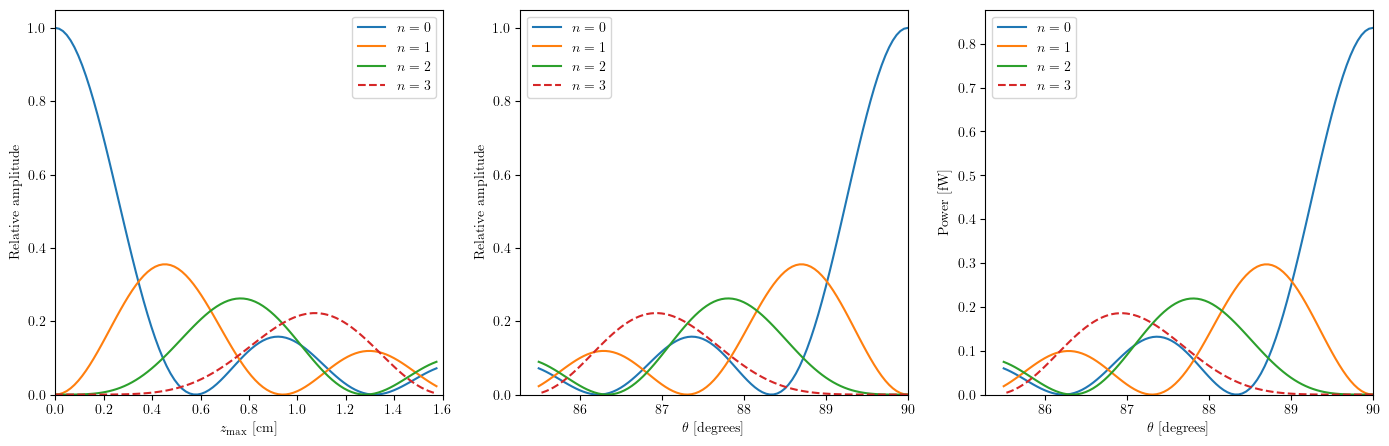

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
ax[0].plot(zMaxArr * 1e2, a0Arr**2, label="$n=0$")
ax[0].plot(zMaxArr * 1e2, a1Arr**2, label="$n=1$")
ax[0].plot(zMaxArr * 1e2, a2Arr**2, label="$n=2$")
ax[0].plot(zMaxArr * 1e2, a3Arr**2, '--', label="$n=3$")
ax[0].set_xlabel(r"$z_\mathrm{max}$ [cm]")
ax[0].set_ylabel("Relative amplitude")
ax[0].set_ylim(0, None)
ax[0].set_xlim(0, 1.6)
ax[0].legend()

ax[1].plot(paArr * 180 / np.pi, a0Arr**2, label="$n=0$")
ax[1].plot(paArr * 180 / np.pi, a1Arr**2, label="$n=1$")
ax[1].plot(paArr * 180 / np.pi, a2Arr**2, label="$n=2$")
ax[1].plot(paArr * 180 / np.pi, a3Arr**2, '--', label="$n=3$")
ax[1].set_xlabel(r"$\theta$ [degrees]")
ax[1].set_ylabel("Relative amplitude")
ax[1].set_ylim(0, None)
ax[1].set_xlim(None, 90.0)
ax[1].legend()

ax[2].plot(paArr * 180 / np.pi, power0Arr * 1e15, label="$n=0$")
ax[2].plot(paArr * 180 / np.pi, power1Arr * 1e15, label="$n=1$")
ax[2].plot(paArr * 180 / np.pi, power2Arr * 1e15, label="$n=2$")
ax[2].plot(paArr * 180 / np.pi, power3Arr * 1e15, '--', label="$n=3$")
ax[2].set_xlabel(r"$\theta$ [degrees]")
ax[2].set_ylabel("Power [fW]")
ax[2].set_ylim(0, None)
ax[2].set_xlim(None, 90.0)
ax[2].legend()

## Bathtub trap
Set up the bathtub trap described in the Project 8 phenomenology paper: $L_0 = 35~\text{cm}$, $L_1 = 0.5~\text{cm}$, $B_0 = 1~\text{T}$.

In [6]:
L0 = 0.35    # metres
L1 = 0.5e-2  # metres
B0 = 1.0     # Tesla
btrap = BathtubTrap(B0, L0, L1)

Begin by plotting the start frequency against the axial frequency for a $30~\text{keV}$ electron.

(10.0, 42.0)

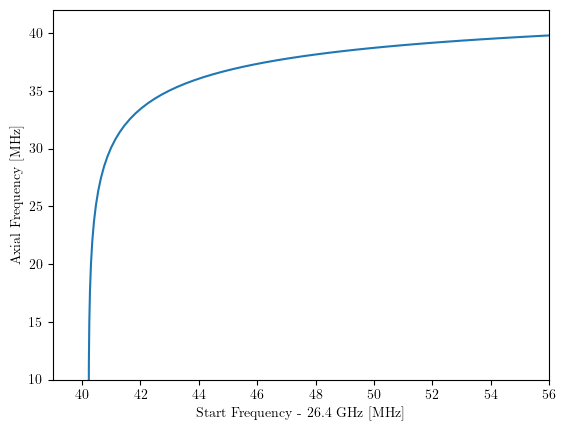

In [ ]:
particle90 = Particle(30e3, np.zeros(3), np.pi/2)
paArr = np.linspace(89.99, 86.0, 100) * np.pi / 180.0
zMaxArr = btrap.CalcZMax(paArr)

startFreqArr = btrap.CalcOmega0(particle90.GetSpeed(), paArr) / (2 * np.pi)
axFreq = btrap.CalcOmegaAxial(particle90.GetSpeed(), paArr) / (2 * np.pi)

fig, ax = plt.subplots(1, 1)
ax.plot((startFreqArr - 26.4e9) / 1e6, axFreq / 1e6)
ax.set_xlabel('Start Frequency - 26.4 GHz [MHz]')
ax.set_ylabel('Axial Frequency [MHz]')
ax.set_xlim(39, 56)
ax.set_ylim(10, 42)

Now attempt to plot the track power against the start frequency.

(0.0, 0.5878765285945067)

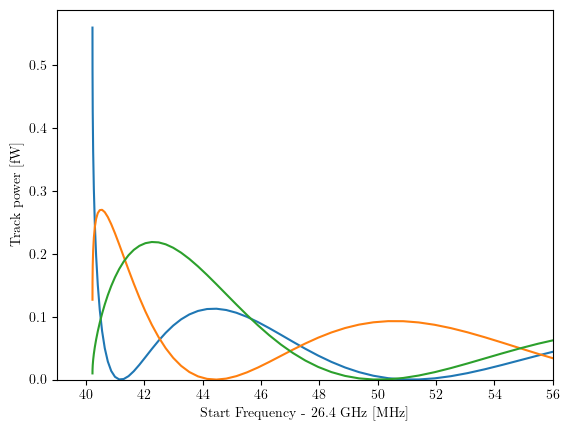

In [13]:
power0Arr_btub = np.zeros_like(zMaxArr)
power1Arr_btub = np.zeros_like(zMaxArr)
power2Arr_btub = np.zeros_like(zMaxArr)
for i, pa in enumerate(paArr):
    particle = Particle(30e3, np.zeros(3), pa)
    spec = PowerSpectrumCalculator(btrap, wg, particle)
    power0Arr_btub[i], _ = spec.GetSpectrumPowers(0)
    power1Arr_btub[i], _ = spec.GetSpectrumPowers(1)
    power2Arr_btub[i], _ = spec.GetSpectrumPowers(2)

fig, ax = plt.subplots(1, 1)
ax.plot((startFreqArr - 26.4e9) / 1e6, power0Arr_btub * 1e15, label='Main peak')
ax.plot((startFreqArr - 26.4e9) / 1e6, power1Arr_btub * 1e15, label='First sideband')
ax.plot((startFreqArr - 26.4e9) / 1e6, power2Arr_btub * 1e15, label='Second sideband')
ax.set_xlabel('Start Frequency - 26.4 GHz [MHz]')
ax.set_ylabel('Track power [fW]')
ax.set_xlim(39, 56)
ax.set_ylim(0, None)

8.662591608391682e-18 3.2969920374974146e-17


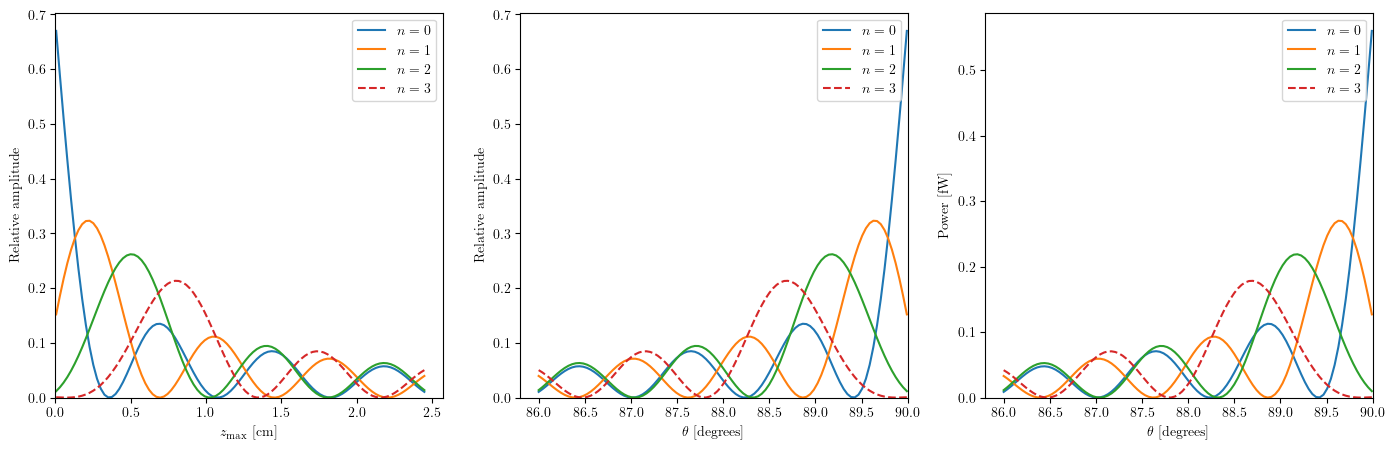

In [9]:
a0Arr_btub = np.zeros_like(zMaxArr, dtype=complex)
a1Arr_btub = np.zeros_like(zMaxArr, dtype=complex)
a2Arr_btub = np.zeros_like(zMaxArr, dtype=complex)
a3Arr_btub = np.zeros_like(zMaxArr, dtype=complex)

power3Arr_btub = np.zeros_like(zMaxArr)
for i, pa in enumerate(paArr):
    particle = Particle(30e3, np.zeros(3), pa)
    spec = PowerSpectrumCalculator(btrap, wg, particle)
    a0Arr_btub[i], _ = spec.GetPeakAmp(0)
    a1Arr_btub[i], _ = spec.GetPeakAmp(1)
    a2Arr_btub[i], _ = spec.GetPeakAmp(2)
    a3Arr_btub[i], _ = spec.GetPeakAmp(3)

    power3Arr_btub[i], _ = spec.GetSpectrumPowers(3)

fig, ax = plt.subplots(1, 3, figsize=(17, 5))
ax[0].plot(zMaxArr * 1e2, np.abs(a0Arr_btub)**2, label="$n=0$")
ax[0].plot(zMaxArr * 1e2, np.abs(a1Arr_btub)**2, label="$n=1$")
ax[0].plot(zMaxArr * 1e2, np.abs(a2Arr_btub)**2, label="$n=2$")
ax[0].plot(zMaxArr * 1e2, np.abs(a3Arr_btub)**2, '--', label="$n=3$")
ax[0].set_xlabel(r"$z_\mathrm{max}$ [cm]")
ax[0].set_ylabel("Relative amplitude")
ax[0].set_ylim(0, None)
ax[0].set_xlim(0, None)
ax[0].legend()

ax[1].plot(paArr * 180 / np.pi, np.abs(a0Arr_btub)**2, label="$n=0$")
ax[1].plot(paArr * 180 / np.pi, np.abs(a1Arr_btub)**2, label="$n=1$")
ax[1].plot(paArr * 180 / np.pi, np.abs(a2Arr_btub)**2, label="$n=2$")
ax[1].plot(paArr * 180 / np.pi, np.abs(a3Arr_btub)**2, '--', label="$n=3$")
ax[1].set_xlabel(r"$\theta$ [degrees]")
ax[1].set_ylabel("Relative amplitude")
ax[1].set_ylim(0, None)
ax[1].set_xlim(None, 90.0)
ax[1].legend()

ax[2].plot(paArr * 180 / np.pi, power0Arr_btub * 1e15, label="$n=0$")
ax[2].plot(paArr * 180 / np.pi, power1Arr_btub * 1e15, label="$n=1$")
ax[2].plot(paArr * 180 / np.pi, power2Arr_btub * 1e15, label="$n=2$")
ax[2].plot(paArr * 180 / np.pi, power3Arr_btub * 1e15, '--', label="$n=3$")
ax[2].set_xlabel(r"$\theta$ [degrees]")
ax[2].set_ylabel("Power [fW]")
ax[2].set_ylim(0, None)
ax[2].set_xlim(None, 90.0)
ax[2].legend()

print(power0Arr_btub[-1], power1Arr_btub[-1])

Delta Omega = 0.000e+00 rad/s
t1 = 2.9100e-03 s
f axial = 0.0001718177559854747 MHz
k_lambda = 4.141e+02
0.6900297183341558
(0.830680274434247+0j)


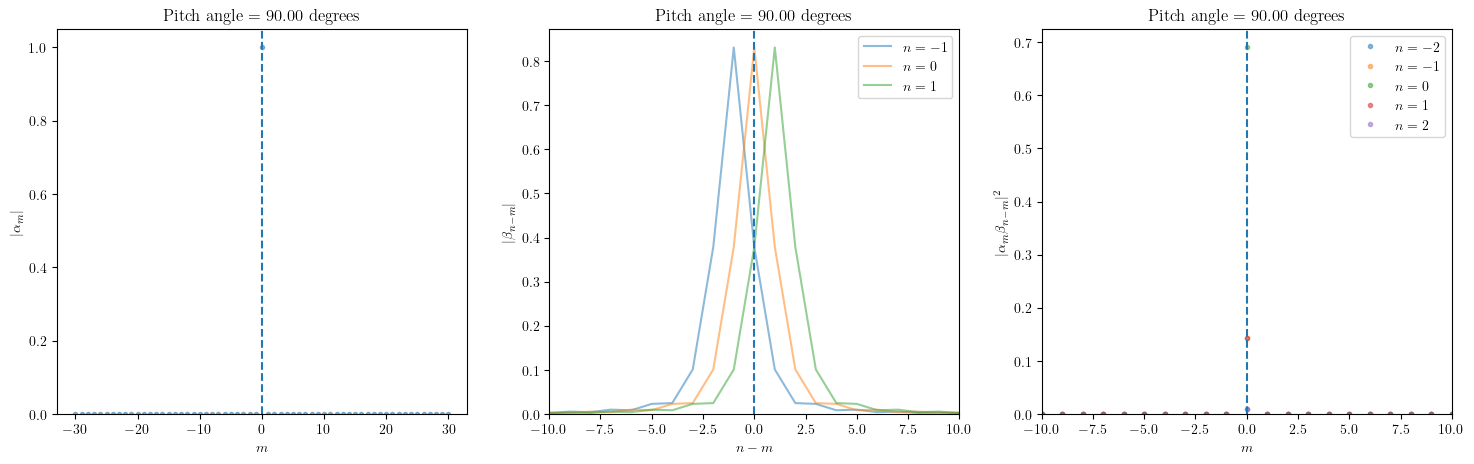

In [ ]:
from scipy.special import jv

PA = 89.999999 * np.pi / 180
particle = Particle(30e3, np.zeros(3), PA)
deltaOmega = btrap.CalcOmega0(particle.GetSpeed(), PA) - sc.e * B0 / (particle.GetGamma() * sc.m_e)
print(f"Delta Omega = {deltaOmega:.3e} rad/s")
omega_a = particle.GetSpeed() * np.sin(PA) / L0
t1 = btrap.CalcT1(particle.GetSpeed(), PA)
print(f"t1 = {t1:.4e} s")
omegaAx = btrap.CalcOmegaAxial(particle.GetSpeed(), PA)
T = 2 * np.pi / omegaAx
print(f"f axial = {omegaAx / (2 * np.pi) / 1e6} MHz")
zmax = btrap.CalcZMax(PA)

MOD_SUM_RANGE = 100
def CalcAlpha_n(n):
    MArr = np.arange(-MOD_SUM_RANGE, MOD_SUM_RANGE+1, 1)

    deltaOmega = btrap.CalcOmega0(particle.GetSpeed(), PA) - sc.e * B0 / (particle.GetGamma() * sc.m_e)
    omegaAx = btrap.CalcOmegaAxial(particle.GetSpeed(), PA)

    A = np.exp(-1j * (deltaOmega + n * omegaAx) * t1 / 2)
    A *= t1 * np.sinc((deltaOmega + n * omegaAx) * t1 / (2 * np.pi))

    B = np.sum(jv(MArr, deltaOmega/(2 * omegaAx)) * np.exp(-1j * n * np.pi/2) * np.sinc((deltaOmega * t1 / 2 - n * np.pi * omegaAx / (2 * omega_a) + MArr * np.pi) / np.pi))
    B *= np.exp(-1j * (deltaOmega + n * omegaAx) * t1 / 2) * np.pi / omega_a
        
    C = ((-1.0)**n) * A
    D = ((-1.0)**n) * B
    return (A + B + C + D) / T
    
def CalcBeta_n(n, klambda):
    MArr = np.arange(-MOD_SUM_RANGE, MOD_SUM_RANGE+1, 1)
    vz0 = particle.GetSpeed() * np.cos(PA)
    E = t1 * np.exp(-1j * n * omegaAx * t1 / 2) * np.sinc((klambda * vz0 - n * omegaAx) * t1 / (2 * np.pi))
    F = np.sum(jv(MArr, klambda * zmax) * (1j)**(MArr-n) * np.sinc((MArr * np.pi / 2 - n * np.pi * omegaAx / (2 * omega_a))/np.pi))
    F *= np.exp(1j * klambda * L1/2) * np.pi * np.exp(-1j * n * omegaAx * t1 / 2) / omega_a
    G = (-1.0)**n * t1 * np.exp(-1j * n * omegaAx * t1 / 2) * np.sinc((klambda * vz0 + n * omegaAx) * t1 / (2 * np.pi))
    H = np.sum(jv(MArr, klambda * zmax) * (1j)**(-MArr-n) * np.sinc((MArr * np.pi / 2 - n * np.pi * omegaAx / (2 * omega_a)) / np.pi))
    H *= (-1.0)**n * np.exp(-1j * klambda * L1 / 2) * np.pi * np.exp(-1j * n * omegaAx * t1 / 2) / omega_a
    return (E + F + G + H) / T

MValues = np.arange(-30, 31, 1)
alphaVals = np.zeros_like(MValues, dtype=complex)
beta0Vals = np.zeros_like(MValues, dtype=complex)
beta1Vals = np.zeros_like(MValues, dtype=complex)
beta2Vals = np.zeros_like(MValues, dtype=complex)
betam1Vals = np.zeros_like(MValues, dtype=complex)
betam2Vals = np.zeros_like(MValues, dtype=complex)
kLambda = btrap.CalcOmega0(particle.GetSpeed(), PA) / wg.GetPhaseVelocity(btrap.CalcOmega0(particle.GetSpeed(), PA))
print(f"k_lambda = {kLambda:.3e}")
combined0Vals = np.zeros_like(MValues, dtype=complex)
combined1Vals = np.zeros_like(MValues, dtype=complex)
combined2Vals = np.zeros_like(MValues, dtype=complex)
combinedm1Vals = np.zeros_like(MValues, dtype=complex)
combinedm2Vals = np.zeros_like(MValues, dtype=complex)
for i, m in enumerate(MValues):
    alpha = CalcAlpha_n(m)
    beta0Vals[i] = CalcBeta_n(0 - m, kLambda)
    beta1Vals[i] = CalcBeta_n(1 - m, kLambda)
    beta2Vals[i] = CalcBeta_n(2 - m, kLambda)
    betam1Vals[i] = CalcBeta_n(-1 - m, kLambda)
    betam2Vals[i] = CalcBeta_n(-2 - m, kLambda)
    combined0Vals[i] = alpha * CalcBeta_n(0 - m, kLambda)
    combined1Vals[i] = alpha * CalcBeta_n(1 - m, kLambda)
    combined2Vals[i] = alpha * CalcBeta_n(2 - m, kLambda)
    combinedm1Vals[i] = alpha * CalcBeta_n(-1 - m, kLambda)
    combinedm2Vals[i] = alpha * CalcBeta_n(-2 - m, kLambda)
    alphaVals[i] = np.abs(alpha)
    #print(f"m = {m}: Alpha_{m} = {alpha}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(MValues, np.abs(alphaVals), '.', alpha=0.5)
ax[0].set_xlabel(r"$m$")
ax[0].set_ylabel(r"$|\alpha_m|$")
ax[0].set_title(f"Pitch angle = {PA * 180 / np.pi:.2f} degrees")
ax[0].axvline(x=0, linestyle='--')
ax[0].set_ylim(0, None)

#ax[1].plot(MValues, np.abs(betam2Vals), '.', alpha=0.5, label=r"$n=-2$")
ax[1].plot(MValues, np.abs(betam1Vals), '-', alpha=0.5, label=r"$n=-1$")
ax[1].plot(MValues, np.abs(beta0Vals), '-', alpha=0.5, label=r"$n=0$")
ax[1].plot(MValues, np.abs(beta1Vals), '-', alpha=0.5, label=r"$n=1$")
#ax[1].plot(MValues, np.abs(beta2Vals), '.', alpha=0.5, label=r"$n=2$")
ax[1].legend()
ax[1].set_xlabel(r"$n-m$")
ax[1].set_ylabel(r"$|\beta_{n-m}|$")
ax[1].set_title(f"Pitch angle = {PA * 180 / np.pi:.2f} degrees")
ax[1].axvline(x=0, linestyle='--')
ax[1].set_ylim(0, None)
ax[1].set_xlim(-10, 10)

ax[2].plot(MValues, np.abs(combinedm2Vals)**2, '.', alpha=0.5, label=r"$n=-2$")
ax[2].plot(MValues, np.abs(combinedm1Vals)**2, '.', alpha=0.5, label=r"$n=-1$")
ax[2].plot(MValues, np.abs(combined0Vals)**2, '.', alpha=0.5, label=r"$n=0$")
ax[2].plot(MValues, np.abs(combined1Vals)**2, '.', alpha=0.5, label=r"$n=1$")
ax[2].plot(MValues, np.abs(combined2Vals)**2, '.', alpha=0.5, label=r"$n=2$")
ax[2].legend()
ax[2].set_xlabel(r"$m$")
ax[2].set_ylabel(r"$|\alpha_m \beta_{n-m}|^2$")
ax[2].set_title(f"Pitch angle = {PA * 180 / np.pi:.2f} degrees")
ax[2].axvline(x=0, linestyle='--')
ax[2].set_ylim(0, None)
ax[2].set_xlim(-10, 10)

print(np.abs(np.sum(combined0Vals))**2)
print(combined0Vals[30])

In [11]:
MArr = np.arange(-40, 41, 1)
vz0 = particle.GetSpeed() * np.cos(PA)
N = 0 
M = 0
SECOND_INDEX = N - M
print(f"T = {T:.4e} s")
print(f"omega_axial = {omegaAx:.3e} rad/s")
print(np.sinc((kLambda * vz0 - SECOND_INDEX * omegaAx) * t1 / (2 * np.pi)))
print(L1)
print(np.sinc(kLambda * L1/(2 * np.pi)))
print(f"t1 = {t1:.3e}")


E = t1 * np.exp(-1j * SECOND_INDEX * omegaAx * t1 / 2) * np.sinc((kLambda * vz0 - SECOND_INDEX * omegaAx) * t1 / (2 * np.pi))

# F
F = np.sum(jv(MArr, kLambda * zmax) * (1j)**(MArr-SECOND_INDEX) * np.sinc((MArr * np.pi / 2 - SECOND_INDEX * np.pi * omegaAx / (2 * omega_a))/np.pi))
F *= np.exp(1j * kLambda * L1/2) * np.pi * np.exp(-1j * SECOND_INDEX * omegaAx * t1 / 2) / omega_a

# G
G = (-1.0)**SECOND_INDEX * t1 * np.exp(-1j * SECOND_INDEX * omegaAx * t1 / 2) * np.sinc((kLambda * vz0 + SECOND_INDEX * omegaAx) * t1 / (2 * np.pi))

# H
H = np.sum(jv(MArr, kLambda * zmax) * (1j)**(-MArr-SECOND_INDEX) * np.sinc((MArr * np.pi / 2 - SECOND_INDEX * np.pi * omegaAx / (2 * omega_a)) / np.pi))
H *= (-1.0)**SECOND_INDEX * np.exp(-1j * kLambda * L1 / 2) * np.pi * np.exp(-1j * SECOND_INDEX * omegaAx * t1 / 2) / omega_a

BETA = (E + F + G + H) / T
print(f"For pitch angle of {PA * 180 / np.pi:.2f} degrees, n = {N}, m = {M}:")
print(f"E = {E:.3e}")
print(f"F = {F:.3e}")
print(f"G = {G:.3e}")
print(f"H = {H:.3e}")
print(f"Beta_{N}-{M} = {BETA}")

T = 5.8201e-03 s
omega_axial = 1.080e+03 rad/s
0.830681504351998
0.005
0.830681504351998
t1 = 2.910e-03
For pitch angle of 90.00 degrees, n = 0, m = 0:
E = 2.417e-03+0.000e+00j
F = 5.699e-09+9.606e-09j
G = 2.417e-03+0.000e+00j
H = 5.699e-09-9.606e-09j
Beta_0-0 = (0.8306802744342471+0j)
